Initial setup

In [1]:
%run "Common setup.ipynb"

In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

Searching for best practices and plotting the keyword and publication trend of the results.

In [3]:
best_practice = wosis.keyword_matches(RC, 
                                      ['best practice', 'good practice', 'best practise', 'good practise', 
                                       'an introduction to', 'a framework for', 'guidelines for'], threshold=95.0)

In [4]:
all_bp = best_practice.combine_recs()
all_bp.name = 'best practice'

In [5]:
# wos_plot.plot_kw_trend(all_bp, title='Best Practices Keyword and Publication Trend')

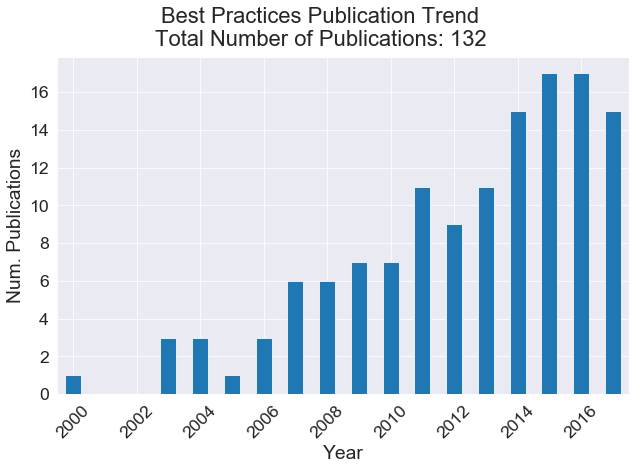

In [6]:
wos_plot.plot_pub_trend(all_bp, title='Best Practices Publication Trend', 
                        save_plot_fn='{}/Figure_9.png'.format(FIG_DIR))

<hr> Running a key-phrase extraction on best practices to identify the fields using this method.

In [7]:
bp_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_bp))

In [8]:
# bp_phrases.display_phrases()

<hr> Top-cited journals for best practice

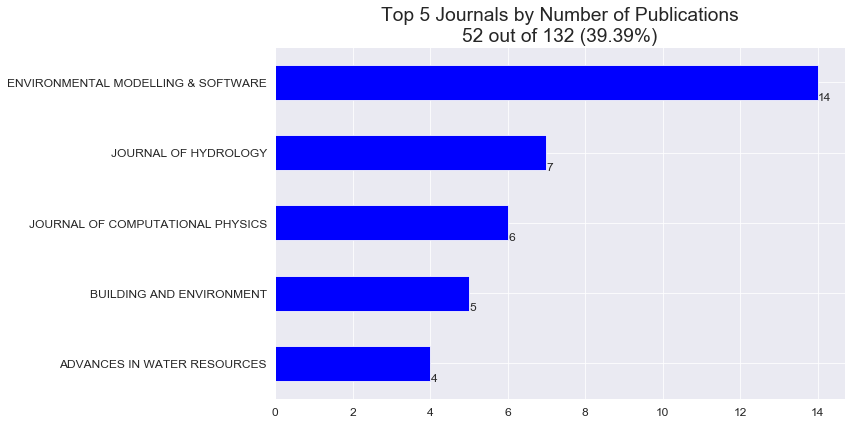

In [9]:
wos_plot.plot_pubs_per_journal(all_bp, top_n=5, annotate=True, show_stats=True)

In [10]:
journals_of_interest_bp = list(map(str.upper, ['Environmental Modelling & Software', 
                           'Journal of Hydrology', 'Journal of Computational Physics', 
                           'Building and Environment', 
                           'Advances in Water Resources']))

pubs_for_journals_bp = wosis.find_pubs_by_journal(all_bp, journals_of_interest_bp)

In [12]:
# Get citations for each paper
paper_citations_per_journal_bp = {}
for journal in pubs_for_journals_bp:
    fn = '{}/collection_bp_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_bp[journal] = wosis.get_num_citations(pubs_for_journals_bp[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

Authenticated (SID: 5AItNtEnwIVQZY5iRai)



Authenticated (SID: 6BvNlCtdeXuuuuOdBwL)



Authenticated (SID: 8DVapA76RbLbpfJbn9G)



Authenticated (SID: 7Bj2iWzaqlKjLVk5GYV)



Authenticated (SID: 7EC7WXxaw3XCTZmxTWF)


In [13]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_bp = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_bp.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_bp = collection_bp.append(df[cols_of_interest][0:10], ignore_index=True)

In [14]:
top_cited_in_top_journals_bp = collection_bp.sort_values('citations', ascending=False)
top_cited_in_top_journals_bp.head(10)

AU  year  \
13  Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...  2007   
28                        Refsgaard, JC|Henriksen, HJ  2004   
14  Pianosi, F|Beven, K|Freer, J|Hall, JW|Rougier,...  2016   
15  Castelletti, A|Galelli, S|Ratto, M|Soncini-Ses...  2012   
23                Janssen, WD|Blocken, B|van Hooff, T  2013   
16              Fu, BH|Newham, LTH|Ramos-Scharron, CE  2010   
24           Booth, AT|Choudhary, R|Spiegelhalter, DJ  2012   
17                  Vanuytrecht, E|Raes, D|Willems, P  2014   
18  Pena-Haro, S|Pulido-Velazquez, M|Llopis-Albert, C  2011   
0            Hughes, DA|Kapangaziwiri, E|Sawunyama, T  2010   

                                                title  \
13  Uncertainty in the environmental modelling pro...   
28  Modelling guidelines - terminology and guiding...   
14  Sensitivity analysis of environmental models: ...   
15  A general framework for Dynamic Emulation Mode...   
23  Pedestrian wind comfort around buildings: Comp...   
16  A review of surface erosion and sediment deliv...   
24       Handling uncertainty in housing stock models   
17  Global sensitivity analysis of yield output fr...   
18  Stochastic hydro-economic modeling for optimal...   
0   Hydrological model uncertainty assessment in s...   

                                             journal citations  \
13  best practice_ENVIRONMENTAL MODELLING & SOFTWARE       536   
28         best practice_ADVANCES IN WATER RESOURCES       194   
14  best practice_ENVIRONMENTAL MODELLING & SOFTWARE       160   
15  best practice_ENVIRONMENTAL MODELLING & SOFTWARE        75   
23            best practice_BUILDING AND ENVIRONMENT        66   
16  best practice_ENVIRONMENTAL MODELLING & SOFTWARE        62   
24            best practice_BUILDING AND ENVIRONMENT        62   
17  best practice_ENVIRONMENTAL MODELLING & SOFTWARE        59   
18  best practice_ENVIRONMENTAL MODELLING & SOFTWARE        34   
0                 best practice_JOURNAL OF HYDROLOGY        30   

                                             DOI link  
13   https://dx.doi.org/10.1016/j.envsoft.2007.02.004  
28  https://dx.doi.org/10.1016/j.advwatres.2003.08...  
14   https://dx.doi.org/10.1016/j.envsoft.2016.02.008  
15   https://dx.doi.org/10.1016/j.envsoft.2012.01.002  
23  https://dx.doi.org/10.1016/j.buildenv.2012.10.012  
16   https://dx.doi.org/10.1016/j.envsoft.2009.07.013  
24  https://dx.doi.org/10.1016/j.buildenv.2011.08.016  
17   https://dx.doi.org/10.1016/j.envsoft.2013.10.017  
18   https://dx.doi.org/10.1016/j.envsoft.2011.02.010  
0    https://dx.doi.org/10.1016/j.jhydrol.2010.04.010

In [15]:
top_cited_in_top_journals_bp.to_csv('{}/top_cited_bp_papers.csv'.format(DATA_DIR))

<hr> Topic trend

In [16]:
all_bp.name = 'Best Practices'

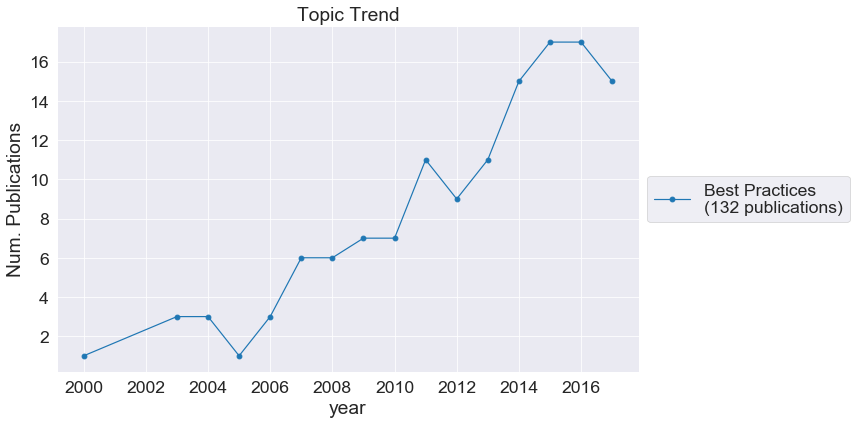

In [17]:
wos_plot.plot_topic_trend([all_bp])

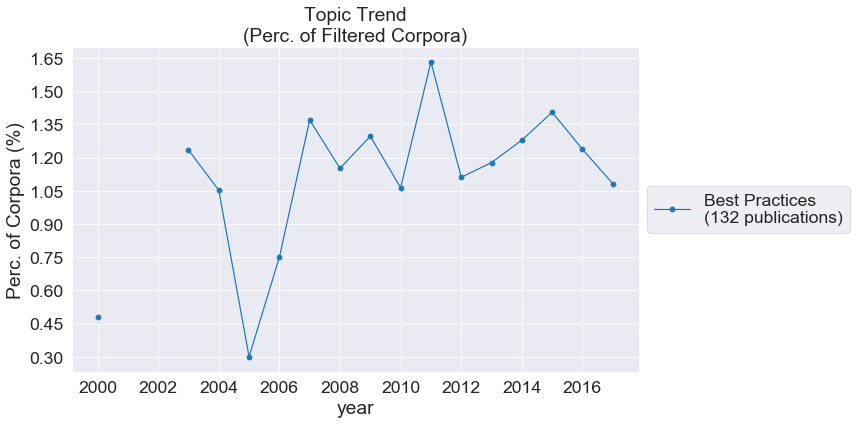

In [18]:
wos_plot.plot_topic_trend([all_bp], total_rc=RC, title='Topic Trend\n(Perc. of Filtered Corpora)')